In [2]:
import sys, os
import numpy as np
import copy

from utils import default_paths, nsd_utils, numpy_utils, stats_utils, prf_utils
from plotting import plot_utils
from model_fitting import initialize_fitting 

import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm


In [12]:
# load correlations between all labels

path_to_save = default_paths.stim_labels_root
which_prf_grid = 5;
fn2save_corrs = os.path.join(path_to_save, 'Semantic_to_semantic_corrs_grid%d.npy'%(which_prf_grid))
fn2save_nsamp = os.path.join(path_to_save, 'Semantic_to_semantic_nsamp_grid%d.npy'%(which_prf_grid))
    
corrs = np.load(fn2save_corrs)
nsamp = np.load(fn2save_nsamp)

save_name_groups = os.path.join(default_paths.stim_labels_root,'All_concat_labelgroupnames.npy')
groups = np.load(save_name_groups, allow_pickle=True).item()
discrim_type_list = groups['discrim_type_list']
n_discrim_types = len(discrim_type_list)


In [19]:
# removing any correlation estimates for small n images
min_samp = 10

below_thresh = (np.sum(nsamp, axis=3)<min_samp) 

corrs[below_thresh] = np.nan

In [20]:
# Make a summary table comparing each label to the three higher-level labels

names =  copy.deepcopy(discrim_type_list)
within_names = ['within_' in nn for nn in names]
for ni, name in enumerate(names):
    if 'within_' in name:        
        cnames = groups['col_names_all'][ni]
        names[ni] = '%s > %s'%(cnames[0], cnames[1])
    elif name=='indoor_outdoor':
        names[ni] = 'indoor > outdoor'
    elif name=='natural_humanmade':
        names[ni] = 'natural > humanmade'
    elif name=='animacy':
        names[ni] = 'animate > inanimate'
        

# average over pRFs here
mean_corrs_with_higherlevel = np.nanmean(corrs[0:3,:,:], axis=2)
corr_df = pd.DataFrame(mean_corrs_with_higherlevel.T, \
                       columns = np.array(names)[[0,1,2]], 
                       index = names)
corr_df

/home/mmhender/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice


,indoor > outdoor,natural > humanmade,animate > inanimate
indoor > outdoor,NaN,-0.721326,-0.406012
natural > humanmade,-0.721326,NaN,0.936658
animate > inanimate,-0.406012,0.936658,NaN
accessory,-0.031941,-0.145931,-0.121322
animal,-0.168861,0.744777,0.756722
appliance,0.324560,-0.270382,-0.190438
electronic,0.288335,-0.224594,-0.161015
food,0.297136,-0.084588,-0.292939
furniture,0.545649,-0.435080,-0.345601
indoor,0.251475,-0.273719,-0.237918


/home/mmhender/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':
/home/mmhender/myenv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/mmhender/myenv/lib/python3.7/site-packages/matplotlib/axes/_base.py:2287: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/home/mmhender/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':
/home/mmhender/myenv/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


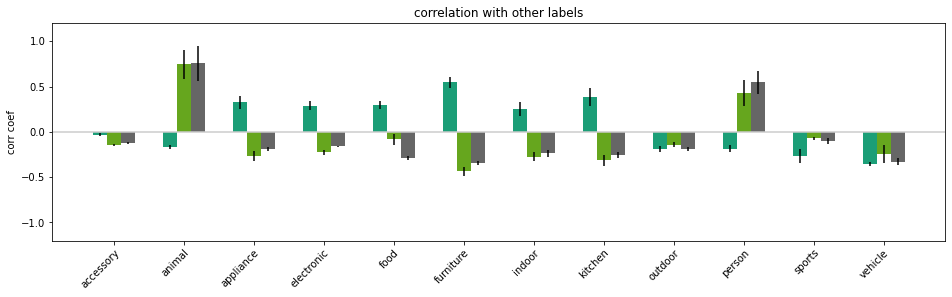

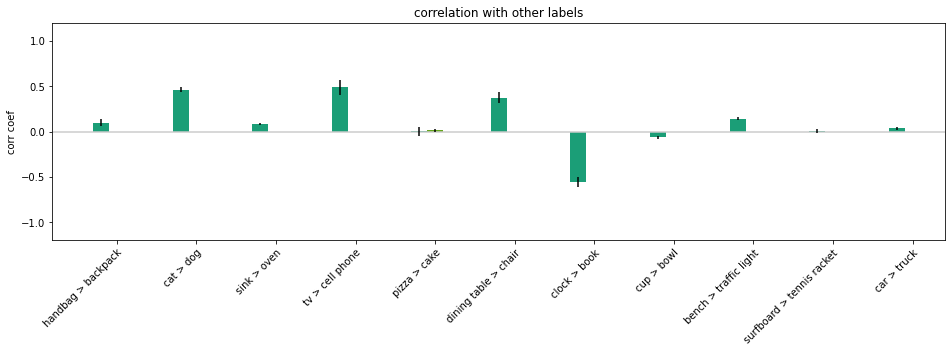

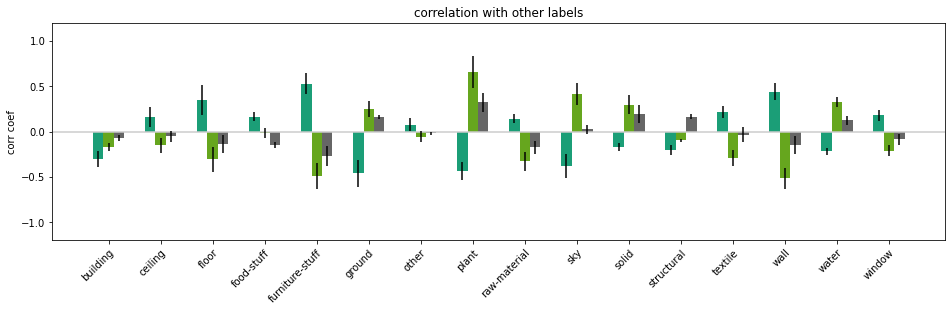

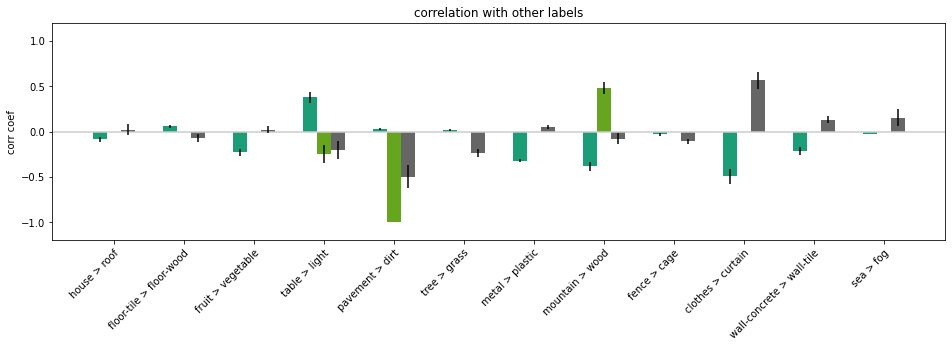

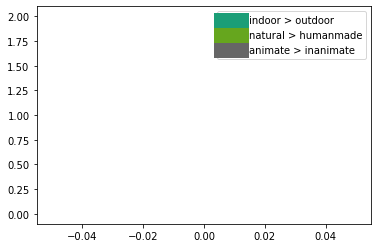

In [118]:
# make bar plots to visualize better

inds2plot1 = np.arange(0,3)

inds_list = [np.arange(3,15), np.arange(15,26), np.arange(26,42), np.arange(42,54)]

feature_colors = cm.Dark2(np.linspace(0,1,len(inds2plot1)))

for ii, inds in enumerate(inds_list):
    
    vals = np.array([corrs[ii,inds,:] for ii in inds2plot1])
    mean_vals = np.nanmean(vals, axis=2).T
    err_vals = np.nanstd(vals, axis=2).T
    
    title = 'correlation with other labels'

    if ii==len(inds_list)-1:
        legend_separate=True
    else:
        legend_separate=False
        
    plot_utils.plot_multi_bars(mean_data=mean_vals, err_data=err_vals, colors=feature_colors, space=0.3, \
                    xticklabels=np.array(names)[inds], ylabel='corr coef', \
                    ylim=[-1.2,1.2], title=title, horizontal_line_pos=0,\
                    legend_labels=np.array(names)[inds2plot1], \
                    legend_overlaid=False, legend_separate=legend_separate, \
                    fig_size=(16,4))

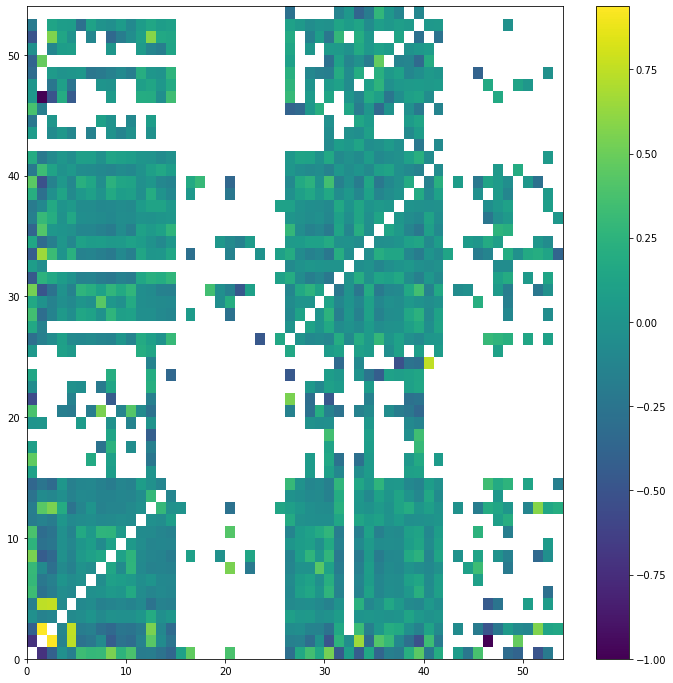

In [119]:
plt.figure(figsize=(12,12));
plt.pcolormesh(np.mean(corrs, axis=2))
plt.colorbar()